# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откроем файл с данными и изучим общую информацию. 

### Загрузим данные из файла в датафрейм data:

In [72]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Выведем первые 10 строк датафрейма:

In [73]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Посмотрим сводную информацию методом info(): 

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Построим общую гистограмму для всех столбцов таблицы:

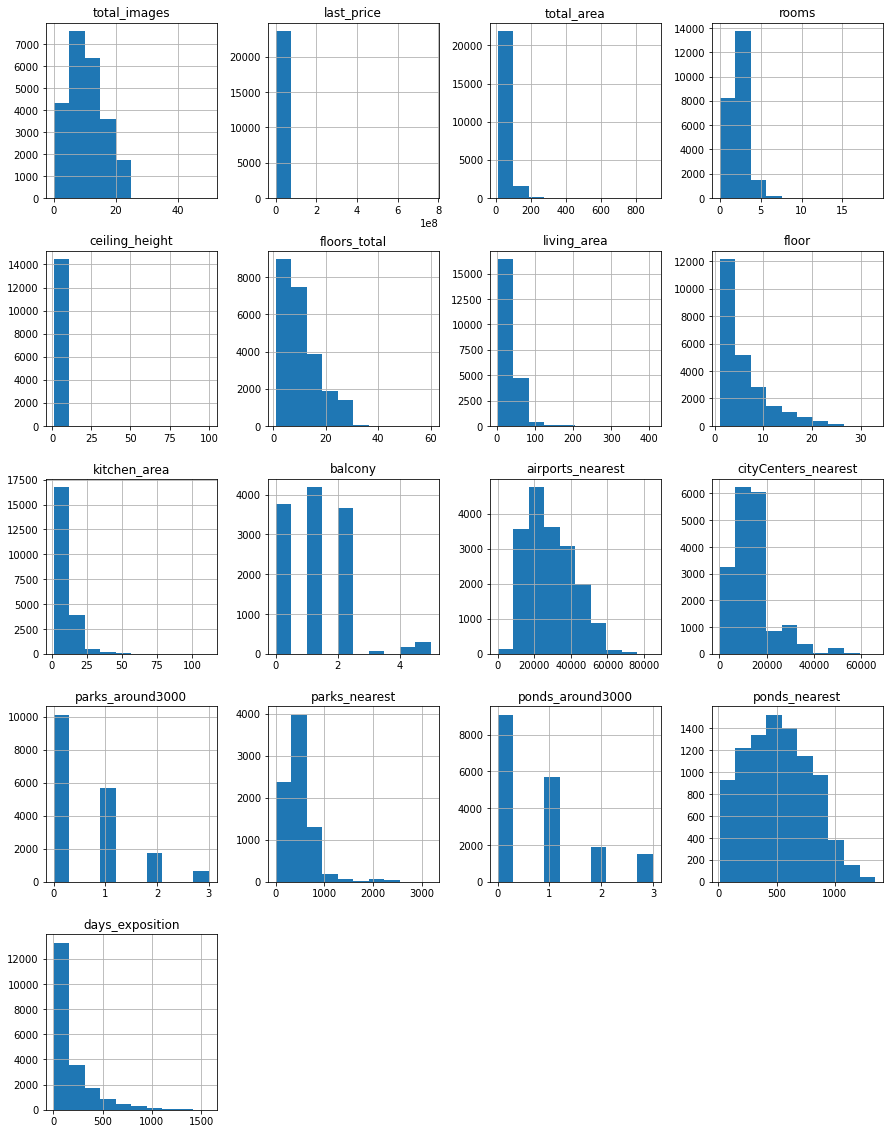

In [75]:
data.hist(figsize=(15, 20)); # предупреждения перед гистограммами убираем с помощью ;

### Посмотрим, встречаются ли дубликаты, методом duplicated():

In [76]:
data.duplicated().sum()

0

### Найдём все пропущенные значения в столбцах:

In [77]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [78]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # Проверим колличество пропусков в %

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


### Посмотрим на числовое описание данных методом describe():

In [79]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Предобработка данных

### Создадим список с наименованием и описанием столбцов:

total_images — число фотографий квартиры в объявлении

last_price — цена на момент снятия с публикации

total_area — общая площадь квартиры в квадратных метрах (м²)

first_day_exposition — дата публикации

rooms — число комнат

ceiling_height — высота потолков (м)

floors_total — всего этажей в доме

living_area — жилая площадь в квадратных метрах (м²)

floor — этаж

is_apartment — апартаменты (булев тип)

studio — квартира-студия (булев тип)

open_plan — свободная планировка (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

balcony — число балконов

locality_name — название населённого пункта

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

### Пройдёмся по всему списку столбцов и при необходимости преобразуем данные в этих столбцах:

####  total_images — число фотографий квартиры в объявлении.

Пропуски отсутствуют. Тип данных int. Столбец не нуждается в преобразовании.

#### last_price — цена на момент снятия с публикации.
Пропуски отсутствуют. Тип данных float. Необходимо преобразовать данные в тип int.

In [80]:
data['last_price'] = data['last_price'].astype(int)

#### total_area — общая площадь квартиры в квадратных метрах (м²).
Пропуски отсутствуют. Тип данных float. Столбец не нуждается в преобразовании.

#### first_day_exposition — дата публикации.
Пропуски отсутствуют. Тип данных object. Необходимо преобразовать значения столбца к типу данных datetime.

In [81]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### rooms — число комнат.
Пропуски отсутствуют. Тип данных int. Столбец не нуждается в преобразовании.

#### ceiling_height — высота потолков (м).
Количество пропусков 9195. Тип данных float. Заменим пропуски на медианное значение столбца.

In [82]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

#### floors_total — всего этажей в доме.
Количество пропусков 86. Тип данных float. Так как выяснить количество этажей в доме не возможно, а количество пропусков мало, то пропуски данного столбца можно удалить. Затем необходимо преобразовать данные в тип int.

In [83]:
data = data.dropna(subset=['floors_total']).copy()
data['floors_total'] = data['floors_total'].astype(int)

#### living_area — жилая площадь в квадратных метрах (м²).
Количество пропусков 1903. Тип данных float. Заполним пропуски. Сначала посчитаем долю жилой площади от общей площади квартиры по медиане. Затем умножим получившуюся долю на общую площадь.

In [84]:
living_ratio = data['living_area'].median() / data['total_area'].median().copy()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

#### floor — этаж.
Пропуски отсутствуют. Тип данных int. Столбец не нуждается в преобразовании.

#### is_apartment — апартаменты (булев тип).
Количество пропусков 20924. Тип данных object. Если нижвижимость является апартаментами, то ей должно быть присвоено значение True. Отсутствие данных (пропуски в строках) могут означать, что недвижимость не является апартаментами. Присвоим пропускам значение False.

In [85]:
data['is_apartment'] = data['is_apartment'].fillna('False').copy()

#### studio — квартира-студия (булев тип).
Пропуски отсутствуют. Тип данных bool. Столбец не нуждается в преобразовании.

#### open_plan — свободная планировка (булев тип).
Пропуски отсутствуют. Тип данных bool. Столбец не нуждается в преобразовании.

#### kitchen_area — площадь кухни в квадратных метрах (м²).
Количество пропусков 2278. Тип данных float. Заполним пропуски. Сначала посчитаем долю площади кухни от общей площади квартиры по медиане. Затем умножим получившуюся долю на общую площадь.

In [86]:
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median().copy()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

#### balcony — число балконов.
Количество пропусков 11519. Тип данных float. Отсутствие данных о количестве балконов может говорить о том, что балконы отсутствуют в принципе. Заменим пропуски на 0. Затем необходимо преобразовать данные в тип int.

In [87]:
data['balcony'] = data['balcony'].fillna('0')
data['balcony'] = data['balcony'].astype(int)

#### locality_name — название населённого пункта.
Количество пропусков 49. Тип данных object. Поскольку определить название населённых пунктов невозможно, а количество строк с пропусками мало, удалим данные строки. 

Посмотрим уникальные значения, выявим неявные дубликаты и избавимся от них.

In [88]:
data = data.dropna(subset=['locality_name'])

In [89]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [90]:
replace_dict = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество '].copy()

for value in replace_dict:
    data['locality_name'] = data['locality_name'].str.replace(value, '')

#### airports_nearest — расстояние до ближайшего аэропорта в метрах (м).
Количество пропусков 5542. Тип данных float. Количество пропусков относительно велико, в данном контексте, такую "вещь" как расстояние заполнять средней или медианной величиной некорректно. Для заполнения данных необходимы конкретные адреса, а не названия населённых пунктов. На данном этапе оставим данные без изменений.

#### cityCenters_nearest — расстояние до центра города (м).
Количество пропусков 5519. Тип данных float. Количество пропусков относительно велико, в данном контексте, такую "вещь" как расстояние заполнять средней или медианной величиной некорректно. Для заполнения данных необходимы конкретные адреса, а не названия населённых пунктов. На данном этапе оставим данные без изменений

#### parks_around3000 — число парков в радиусе 3 км.
Количество пропусков 5518. Тип данных float. В целом данные пропуски можно было бы заменить медианным значением по столбцу, но поскольку невозможно оценить реальное количество парков, заменим пропущенные значения на 0. Затем преобразуем данные в тип int.

In [91]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].astype(int)

#### parks_nearest — расстояние до ближайшего парка (м).
Количество пропусков 15620. Тип данных float. Хотя количество пропусков велико, в данном контексте, такую "вещь" как расстояние заполнять средней или медианной величиной некорректно. Для заполнения данных необходимы конкретные адреса, а не названия населённых пунктов. На данном этапе оставим данные без изменений

#### ponds_around3000 — число водоёмов в радиусе 3 км.
Количество пропусков 5518. Тип данных float. В целом данные пропуски можно было бы заменить медианным значением по столбцу, но поскольку невозможно оценить реальное количество водоёмов, заменим пропущенные значения на 0. Затем преобразуем данные в тип int.

In [92]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#### ponds_nearest — расстояние до ближайшего водоёма (м).
Количество пропусков 14589. Тип данных float. Хотя количество пропусков велико, в данном контексте, такую "вещь" как расстояние заполнять средней или медианной величиной некорректно. Для заполнения данных необходимы конкретные адреса, а не названия населённых пунктов. На данном этапе оставим данные без изменений.

#### days_exposition — сколько дней было размещено объявление (от публикации до снятия).
Количество пропусков 3181. Тип данных float. Количество пропусков относительно велико, но не имея реальной информации по количеству дней размещения объявления заполнять пропуски средней или медианной величиной некорректно. На данном этапе оставим данные без изменений.

### Поиск и обработка аномалий
Найдём и устраним редкие и выбивающиеся значения.

In [93]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.151900e+04,22326.000000,23565.000000,20601.000000,23565.000000,22678.000000,23565.000000,22250.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,18721.000000
mean,9.878421,4.837115e+06,54.319704,2.013495,2.631089,10.675875,31.544202,5.878124,9.417492,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,128.299343
std,5.681156,2.215774e+06,19.331030,0.986750,0.081473,6.594823,13.750882,4.871485,3.177448,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,121.064671
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,41.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,85.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.650000,16.000000,40.700000,8.000000,11.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,182.000000
max,50.000000,1.186686e+07,114.200000,5.000000,2.850000,60.000000,76.730769,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,509.000000


Аномальные значения на основе 1.5 размаха отброшены. Значения стали более приближёнными к реальности.

### Посчитаем и добавим в таблицу новые столбцы

#### цена одного квадратного метра
Поделим стоимость недвижимости на общую площадь.

In [94]:
data['price_sq_meter'] = data['last_price'] / data['total_area']

#### день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
Воспользуемся методом dt.weekday

In [95]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### месяц публикации объявления
Воспользуемся методом dt.month

In [96]:
data['month'] = data['first_day_exposition'].dt.month

#### год публикации объявления
Воспользуемся методом dt.year

In [97]:
data['year'] = data['first_day_exposition'].dt.year

#### тип этажа квартиры (значения — «первый», «последний», «другой»)
напишем функцию для заполнения столбца типом этажа

In [98]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)  

#### расстояние в км до центра города
Переведём расстояние из метров в километры. Заполним пустые строки медианным значением (хотя ранее я указывал, что для заполнения данных необходимы конкретные адреса, а не названия населённых пунктов, в данном случае заполним пустые строки, т.к. в дальнейшим нам понадобится данная колонка для расчёта средней стоимости цены квадратного метра по мере удаления квартиры от центра города). Преобразуем данные в тип int. 

In [99]:
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000


data['cityCenters_km'].fillna(data['cityCenters_km'].median(), inplace=True)


data['cityCenters_km'] = data['cityCenters_km'].astype(int)

### Проведём исследовательский анализ данных
Изучим и опишем следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления.
  
Построим гистограммы для каждого параметра.

#### общая площадь  

числовое описание данных
count    22326.000000
mean        54.319704
std         19.331030
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64


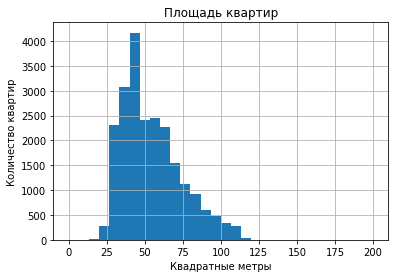

Наибольшие значения по площади
5978     114.2
19021    114.2
1170     114.2
4657     114.2
20477    114.2
5853     114.1
18122    114.0
6462     114.0
19959    114.0
8249     114.0
Name: total_area, dtype: float64


In [100]:
print('числовое описание данных')
print(data['total_area'].describe())

import matplotlib.pyplot as plt

plt.hist(data['total_area'], bins=30, range=(0,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по площади')
print(data['total_area'].sort_values(ascending=False).head(10))

Вывод:

Большинство квартир имеют площадь менее 100 квадратных метров.

#### жилая площадь  

числовое описание данных
count    22678.000000
mean        31.544202
std         13.750882
min          2.000000
25%         18.700000
50%         30.000000
75%         40.700000
max         76.730769
Name: living_area, dtype: float64


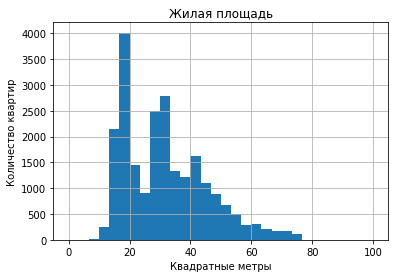

Наибольшие значения по жилой площади
17978    76.730769
8470     76.700000
18109    76.650000
22705    76.528846
16618    76.500000
8933     76.500000
19694    76.442308
12604    76.400000
7202     76.400000
7239     76.400000
Name: living_area, dtype: float64


In [101]:
print('числовое описание данных')
print(data['living_area'].describe())

plt.hist(data['living_area'], bins=30, range=(0,100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по жилой площади')
print(data['living_area'].sort_values(ascending=False).head(10))

Вывод:

Самые распространённые варианты с жилой площадью от 10 до 50 метров. Пика графика вызваны, скорее всего, тем, что это жилые площади для однокомнатной и для двукомнатной квартир.

#### площадь кухни  

числовое описание данных
count    22250.000000
mean         9.417492
std          3.177448
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.450000
Name: kitchen_area, dtype: float64


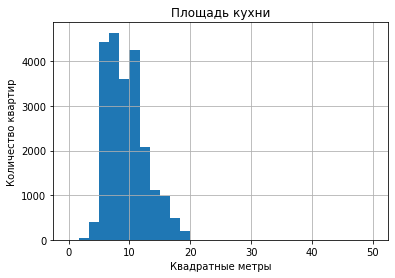

Наибольшие значения по площади кухни
9448     19.450
16505    19.425
8286     19.420
6721     19.400
9723     19.400
8901     19.400
417      19.400
3056     19.400
15365    19.400
14212    19.400
Name: kitchen_area, dtype: float64


In [102]:
print('числовое описание данных')
print(data['kitchen_area'].describe())

plt.hist(data['kitchen_area'], bins=30, range=(0,50))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по площади кухни')
print(data['kitchen_area'].sort_values(ascending=False).head(10))


Вывод:

Самые распространённые варианты - кухни с площадью от 5 до 12 квадратных метров. 

#### цена объекта  

числовое описание данных
count    2.151900e+04
mean     4.837115e+06
std      2.215774e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.186686e+07
Name: last_price, dtype: float64


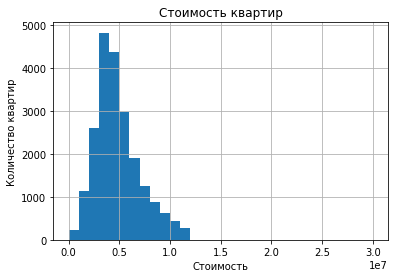

Наибольшие значения по цене
3165     11866860.0
21860    11858000.0
12437    11850000.0
10068    11840000.0
19454    11820000.0
20193    11809670.0
22326    11800000.0
3642     11800000.0
2507     11800000.0
2267     11800000.0
Name: last_price, dtype: float64


In [103]:
print('числовое описание данных')
print(data['last_price'].describe())

plt.hist(data['last_price'], bins=30, range=(0,30000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по цене')
print(data['last_price'].sort_values(ascending=False).head(10))

Вывод:

В основном стоимость квартир - порядка 4-5 миллионов. 

#### количество комнат

числовое описание данных
count    23565.000000
mean         2.013495
std          0.986750
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


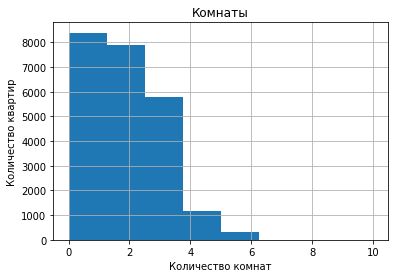

Наибольшие значения по количеству комнат
18447    5
5518     5
23305    5
13139    5
335      5
7799     5
2137     5
3267     5
11018    5
10474    5
Name: rooms, dtype: int64


In [104]:
print('числовое описание данных')
print(data['rooms'].describe())

plt.hist(data['rooms'], bins=8, range=(0,10))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по количеству комнат')
print(data['rooms'].sort_values(ascending=False).head(10))

Вывод:

Основная масса это квартиры с 1, 2 и 3 комнатами. По мере увеличения количества комнат количество квартир сокращается. 

#### высота потолков

числовое описание данных
count    20601.000000
mean         2.631089
std          0.081473
min          2.460000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64


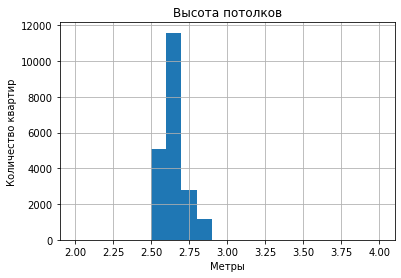

Наибольшие значения по высоте потолков
1378     2.85
147      2.85
15594    2.85
5435     2.85
3685     2.85
17169    2.85
10462    2.85
16257    2.85
2212     2.85
11037    2.85
Name: ceiling_height, dtype: float64


In [105]:
print('числовое описание данных')
print(data['ceiling_height'].describe())

plt.hist(data['ceiling_height'], bins=20, range=(2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по высоте потолков')
print(data['ceiling_height'].sort_values(ascending=False).head(10))


Вывод:

Разброс по высоте потолка не большой - от 2,5 до 2,85 метров. 

#### этаж квартиры

числовое описание данных
count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


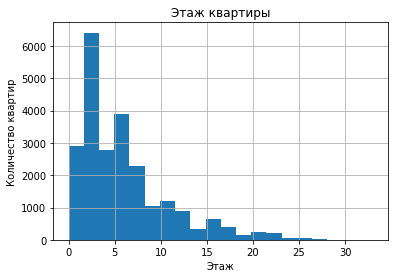

Наибольшие значения по этажу квариры
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
12888    27
16644    27
23292    27
4091     27
Name: floor, dtype: int64


In [106]:
print('числовое описание данных')
print(data['floor'].describe())

plt.hist(data['floor'], bins=20, range=(0,33))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по этажу квариры')
print(data['floor'].sort_values(ascending=False).head(10))

Вывод:

Большинство вариантов - до 10 этажей с пиком квартир на 2 и 3 этажах. 

#### тип этажа квартиры («первый», «последний», «другой»)

числовое описание данных
count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object


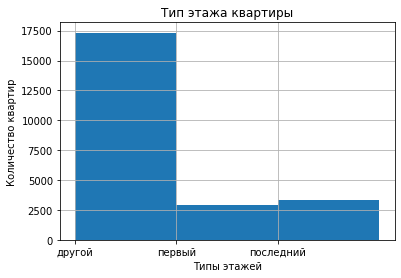

In [107]:
print('числовое описание данных')
print(data['floor_type'].describe())

plt.hist(data['floor_type'], bins=3, range=(0,3))
plt.title('Тип этажа квартиры')
plt.xlabel('Типы этажей')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()

Вывод:

На первом и последнем этажах количество выставленных на продажу квартир значительно меньше, чем на других этажах.

#### общее количество этажей в доме

числовое описание данных
count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


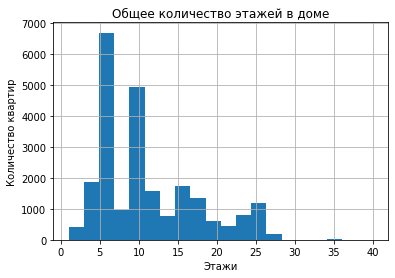

Наибольшие значения по общему количеству этажей в доме
2253     60
16731    52
16934    37
5807     36
11079    36
397      36
13975    35
2966     35
9186     35
1917     35
Name: floors_total, dtype: int64


In [108]:
print('числовое описание данных')
print(data['floors_total'].describe())

plt.hist(data['floors_total'], bins=20, range=(1,40))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по общему количеству этажей в доме')
print(data['floors_total'].sort_values(ascending=False).head(10))

Вывод:

В основном на продажу выставляются квартиры в "пятиэтажках", о чём говорит первый пик. Следом идут "десятиэтажки". Вероятно, это обусловлено застройкой городов типовыми домами одинаковой этажности.

#### расстояние до центра города в метрах

числовое описание данных
count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


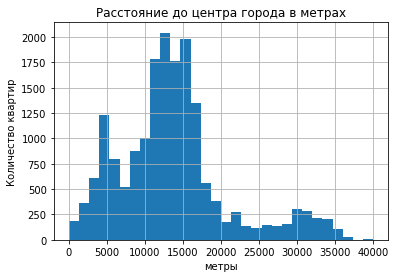

Наибольшие значения по расстоянию до центра города в метрах
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64


In [109]:
print('числовое описание данных')
print(data['cityCenters_nearest'].describe())

plt.hist(data['cityCenters_nearest'], bins=30, range=(0,40000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по расстоянию до центра города в метрах')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

Вывод:

Основная масса квартир выставленных на продажу находится в радиусе 8-20 км от центра города, хотя встречается небольшой всплеск в районе 5 км. Обычно центр города занят историческими постройками и количество жилой недвижимости там меньше. Далее, по мере удаления квартир от центра, количество предложений снижается.

#### расстояние до ближайшего аэропорта

числовое описание данных
count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


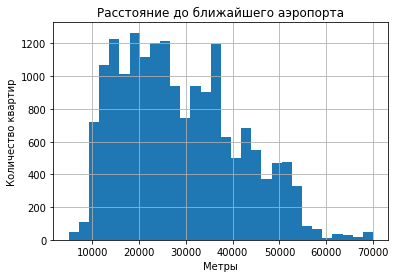

Наибольшие значения по расстоянию до ближайшего аэропорта
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


In [110]:
print('числовое описание данных')
print(data['airports_nearest'].describe())

plt.hist(data['airports_nearest'], bins=30, range=(5000,70000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по расстоянию до ближайшего аэропорта')
print(data['airports_nearest'].sort_values(ascending=False).head(10))

Вывод:

Основная масса квартир расположена на расстоянии от 10 до 40 километров. Такое большое количество квартир может быть обусловлено тем, что Санкт-Петербург и область имеют три аэропорта:

Пулково - Международный аэропорт, имеющий статус федерального значения;

Левашово - Аэродром совместного базирования в Санкт-Петербурге;

Ржевка - Аэропорт местных воздушных линий Санкт-Петербурга.

#### расстояние до ближайшего парка

числовое описание данных
count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


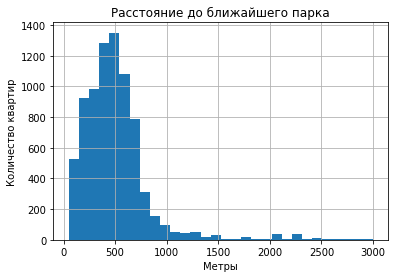

Наибольшие значения по расстоянию до ближайшего парка
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64


In [111]:
print('числовое описание данных')
print(data['parks_nearest'].describe())

plt.hist(data['parks_nearest'], bins=30, range=(50,3000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()
print('Наибольшие значения по расстоянию до ближайшего парка')
print(data['parks_nearest'].sort_values(ascending=False).head(10))

Вывод:

Основная группа квартир имеют парки в радиусе одного километра. Больше всего - на расстоянии около 500 метров.

#### день публикации объявления

числовое описание данных
count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


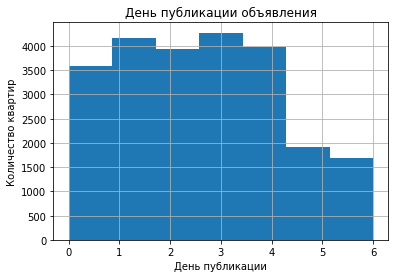

In [112]:
print('числовое описание данных')
print(data['weekday'].describe())

plt.hist(data['weekday'], bins=7, range=(0,6))
plt.title('День публикации объявления')
plt.xlabel('День публикации')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()

Вывод:

В целом, распределение дней публикации выглядят достаточно однородно, если говорить о будних днях. В выходные публикаций меньше. Это может быть связано с тем, что часть риэлторов, которые помогают людям в продаже квартир, могут работать по графику 5/2.

#### месяц публикации объявления

числовое описание данных
count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


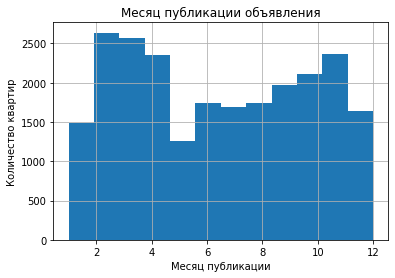

In [113]:
print('числовое описание данных')
print(data['month'].describe())

plt.hist(data['month'], bins=12, range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()

Вывод:

Основная масса квартир выставляются на продажу вначале года. В конце весны начале лета наблюдается спад, который может быть вызван сезоном отпусков. Сначала лета и до декабря идёт постепенный рост выставления квартир на продажу, который заканчивается в декабре очередным спадом. Это может быть связано с концом года - наступлением новогодних праздников.   

### Изучим, как быстро продавались квартиры
Быстрота продажи квартир (столбец days_exposition) это параметр показывающий, сколько дней «висело» каждое объявление.
Выполним следующие действия:
  - построим гистограмму;
  - посчитаем среднее и медиану;
  - опишем, сколько обычно занимает продажа, какие продажи можно считать быстрыми, а какие — необычно долгими.

#### Строим гистограмму

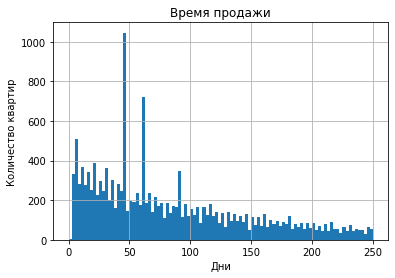

In [114]:
plt.hist(data['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.grid(which='major')
plt.show()

#### Cчитаем среднее и медиану

In [115]:
data['days_exposition'].describe()

count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

#### Опишем, сколько обычно занимает продажа

Время продажи (медиана): 85 дней.

Время продажи (среднее): 128 дней.


В основном квартиры продаются в срок до 100 дней. 

Быстрой продажей можно считать срок до 41 дня. Долгой продажей - 182 дня.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
Построим графики, которые покажут зависимость цены от указанных ниже параметров:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год).

#### График зависимости цены от общей площади

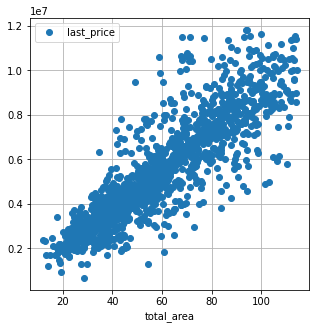

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905372
total_area    0.905372    1.000000 



In [116]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

#### График зависимости цены от жилой площади

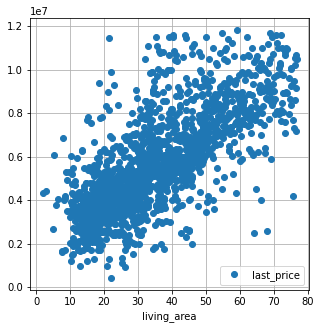

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.728863
living_area    0.728863     1.000000 



In [117]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

#### График зависимости цены от площади кухни

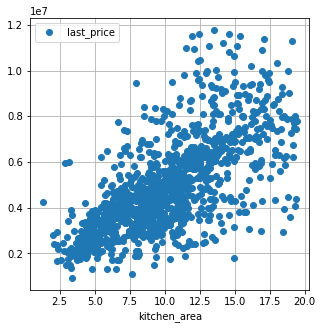

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.445342
last_price        0.445342    1.000000 



In [118]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

#### График зависимости цены от количество комнат

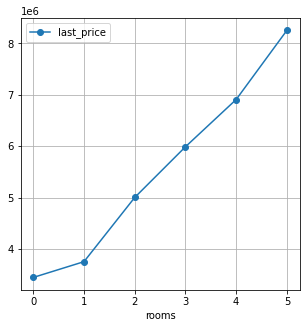

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.563322
rooms         0.563322  1.000000 



In [119]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

#### График зависимости цены от типа этажа, на котором расположена квартира (первый, последний, другой)

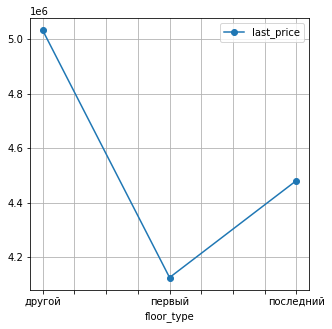

In [120]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

#### График зависимости цены от даты размещения (день недели, месяц, год)

График зависимости цены от даты размещения (день недели)


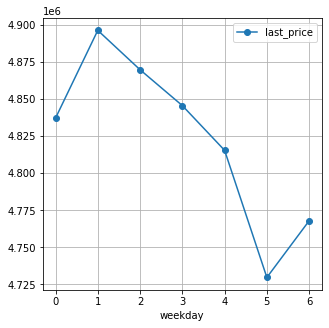

Корреляция цены и даты размещения (день недели): 

            last_price   weekday
last_price    1.000000  0.668132
weekday       0.668132  1.000000 

График зависимости цены от даты размещения (месяц)


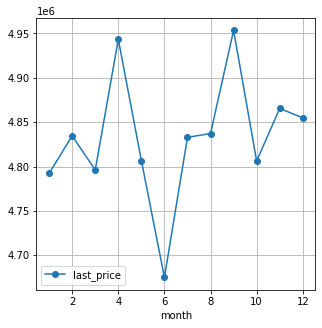

Корреляция цены и даты размещения (месяц): 

            last_price     month
last_price    1.000000  0.031709
month         0.031709  1.000000 

График зависимости цены от даты размещения (год)


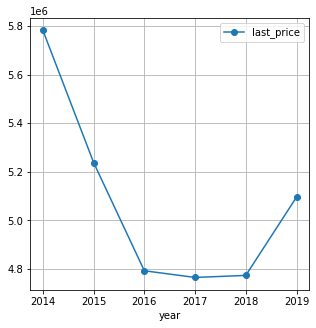

Корреляция цены и даты размещения (год): 

            last_price      year
last_price    1.000000  0.073543
year          0.073543  1.000000 



In [121]:
print('График зависимости цены от даты размещения (день недели)')
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и даты размещения (день недели):','\n')
print(data.pivot_table(index='floor', values=['weekday', 'last_price']).corr(),'\n')

print('График зависимости цены от даты размещения (месяц)')
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и даты размещения (месяц):','\n')
print(data.pivot_table(index='floor', values=['month', 'last_price']).corr(),'\n')

print('График зависимости цены от даты размещения (год)')
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и даты размещения (год):','\n')
print(data.pivot_table(index='floor', values=['year', 'last_price']).corr(),'\n')

Вывод:

Общая площадь - чем больше площадь, тем выше стоимость. Корреляция этих параметров высокая.

Жилая площадь - чем больше площадь, тем выше стоимость. Корреляция этих параметров средняя.

Площадь кухни - чем больше площадь, тем выше стоимость. Корреляция этих параметров невысокая.

Количество комнат - чем больше комнат, тем выше стоимость.

Тип этажа, на котором расположена квартира (первый, последний, другой) - квартиры, расположенные на 1 этаже в среднем значительно дешевле. Более дорогие квартиры - на последнем этаже. В середине - квартиры, расположенные не на 1 и последнем этажах.

Даты размещения (день недели, месяц, год): День недели: дороже всего недвижимость, выставленная на продажу во вторник, дешевле всего - в субботу. Месяц: дороже всего недвижимость, выставленная на продажу в сентября, дешевле всего - в июне.
Год: недвижимость сильно подешевела в 2014-2016 годах. Затем в 2016-2018 падение цен продолжилось но оно было небольшим. С 2018 года цены на недвижимость снова стали расти.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [122]:
print('')
print('Населённые пункты с самой высокой стоимостью квадратного метра')
city_top_ten = data['locality_name'].value_counts().head(10)
city_price_sq_meter = data.query('locality_name in (@city_top_ten.index)').pivot_table(values='price_sq_meter', index='locality_name')
city_price_sq_meter.sort_values('price_sq_meter', ascending=False)


Населённые пункты с самой высокой стоимостью квадратного метра


,price_sq_meter
locality_name,
Санкт-Петербург,105686.252560
Пушкин,100462.063435
Кудрово,95086.975249
Парголово,90332.263023
Мурино,86041.116064
Шушары,78578.068204
Колпино,75221.876295
Гатчина,68664.035870
Всеволожск,67222.431462


In [123]:
print('')
print('Населённые пункты с самой низкой стоимостью квадратного метра')
city_bottom_ten = data['locality_name'].value_counts().tail(10)
city_price_sq_meter = data.query('locality_name in (@city_bottom_ten.index)').pivot_table(values='price_sq_meter', index='locality_name')
city_price_sq_meter.sort_values('price_sq_meter')


Населённые пункты с самой низкой стоимостью квадратного метра


,price_sq_meter
locality_name,
Сижно,13709.677419
Почап,16037.735849
Пельгора,18269.230769
Алексеевка,22222.222222
Котлы,24886.877828
Платформа 69-й километр,25616.698292
Каложицы,26715.686275
Дзержинского,33439.490446
Гончарово,41371.158392


Вывод:

Наибольшая средняя цена одного квадратного метра в населённых пунктах с наибольшим числом объявлений в г. Санкт-Петербург.

Наименьшая средняя цена одного квадратного метра в населённых пунктах с наибольшим числом объявлений в пос. Пчевжа.

### Вычислим среднюю цену каждого километра. 

Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. 

Опишем, как стоимость объектов зависит от расстояния до центра города.

In [124]:
locality_SPB = data.query('locality_name == "Санкт-Петербург"')
locality_SPB_pivot = locality_SPB.pivot_table(index='cityCenters_km', values='price_sq_meter', aggfunc='mean').reset_index()
locality_SPB_pivot

,cityCenters_km,price_sq_meter
0,0,123870.110674
1,1,118617.393290
2,2,114140.059975
3,3,111305.059705
4,4,120323.080346
5,5,121464.256405
6,6,119538.890067
7,7,117948.169268
8,8,111952.996013
9,9,105731.162750


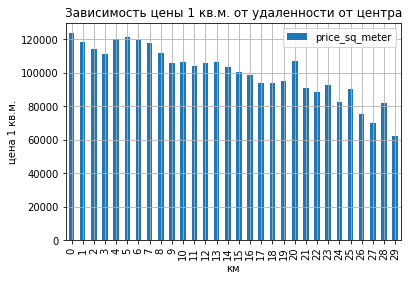

In [125]:
locality_SPB_pivot.plot(x='cityCenters_km', y='price_sq_meter', kind= 'bar', grid=True, title='Зависимость цены 1 кв.м. от удаленности от центра').set(xlabel='км', ylabel='цена 1 кв.м.');

Радиус разброса квартир - 29 км от центра города. 

В самом центре города цена квадратного метра порядка 120 000 руб.

В радиусе до 7 км цена колеблится в диапазоне от 115 000 до 120 000 руб.

По мере удаления квартир от центра города - цена за квадратный метр снижается.

## Общий вывод

Анализ представленных данных подтверждает известные тенденции в части стоимости квартир. На цену влияют различные уточняющие параметры жилья, такие как площадь жилья (чем больше площадь, тем выше цена), близость к центру города (чем ближе, тем дороже) и т.д.

Основная масса недвижимости выставляется на продажу вначале года. В конце весны начале лета наблюдается спад. Сначала лета и до декабря идёт постепенный рост выставления недвижимости на продажу, который заканчивается в декабре очередным спадом. В основном недвижимость продаётся в срок до 100 дней. Быстрой продажей можно считать срок до 41 дня. Долгой продажей -  от 182 дней.

Основная масса представленной недвижимости стоит порядка 4-5 миллионов.
Наибольшая средняя цена одного квадратного метра в г. Санкт-Петербург, а наименьшая - в пос. Пчевжа.

В центре Санкт-Петербурга цена квадратного метра составляет порядка 120 000 руб. По мере удаления квартир от центра города - цена за квадратный метр снижается.

Большинство квартир имеют площадь менее 100 квадратных метров. Самые распространённые варианты с жилой площадью от 10 до 50 квадратных метров и площадью кухни - от 5 до 12 квадратных метров. Основную массу выставленных на продажу квартир составляют 1, 2, 3 комнатные квартиры.

В целом тенденция - чем больше площадь, тем выше цена  - проявляется однозначно. Корреляция по площади выглядит следующим образом: 
корреляция общей площади -  высокая;
корреляция жилой площади -  средняя;
корреляция площади кухни -  низкая.

На первом и последнем этажах количество выставленных на продажу квартир значительно меньше, чем на других этажах. Квартиры, расположенные на первом этаже в среднем значительно дешевле. Более дорогие квартиры - на последнем этаже. В середине - квартиры, расположенные не на 1 и последнем этажах.